In [ ]:
!gdown --id 1iNBLFXyiS4kiJkPZJb_9-KO-LRYS4Z7V --output audio_wav_especialistas.zip
!unzip audio_wav_especialistas.zip
!rm -rf audio_wav_especialistas.zip

Downloading...
From: https://drive.google.com/uc?id=1iNBLFXyiS4kiJkPZJb_9-KO-LRYS4Z7V
To: /content/audio_wav_especialistas.zip
607MB [00:03, 175MB/s]
Archive:  audio_wav_especialistas.zip
   creating: content/audios_expecialistas/
  inflating: content/audios_expecialistas/30fa4631-eba2-44d7-ba44-4ef930092d45.wav  
  inflating: content/audios_expecialistas/9b110ff2-f5c2-4e6e-8bb3-31f502375c7d.wav  
  inflating: content/audios_expecialistas/0b6f8543-c5e3-414c-a4f3-020e56e8ec60.wav  
  inflating: content/audios_expecialistas/c3174535-aaef-4c26-b0b5-a38996e54763.wav  
  inflating: content/audios_expecialistas/46723cf9-49fd-404f-b62f-6ba97019d921.wav  
  inflating: content/audios_expecialistas/2e0e732f-3cf5-4fb6-9762-aae4ab603d4d.wav  
  inflating: content/audios_expecialistas/8debc554-dee0-49c8-8a54-34c26de4190d.wav  
  inflating: content/audios_expecialistas/98e4742a-3aab-4dcb-a5b8-e903f91c4324.wav  
  inflating: content/audios_expecialistas/20638b85-0ab9-45cc-b257-9ce9986946de.wav  
  in

In [ ]:
!gdown --id 1CH_frCeUmyolVZtULFjE7FmhYaQalNd2 --output metadata_compiled.csv

Downloading...
From: https://drive.google.com/uc?id=1CH_frCeUmyolVZtULFjE7FmhYaQalNd2
To: /content/metadata_compiled.csv
2.79MB [00:00, 89.2MB/s]


In [ ]:
import pandas as pd
df_original = pd.read_csv('/content/metadata_compiled.csv')
df_original

,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,quality_1,cough_type_1,dyspnea_1,wheezing_1,stridor_1,choking_1,congestion_1,nothing_1,diagnosis_1,severity_1,quality_2,cough_type_2,dyspnea_2,wheezing_2,stridor_2,choking_2,congestion_2,nothing_2,diagnosis_2,severity_2,quality_3,dyspnea_3,wheezing_3,stridor_3,choking_3,congestion_3,nothing_3,cough_type_3,diagnosis_3,severity_3
0,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,40.0,-75.1,34.0,male,True,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,-16.5,-71.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,2020-04-13T22:23:06.997578+00:00,0.9968,NaN,NaN,21.0,male,False,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001c85a8-cc4d-4921-9297-848be52d4715,2020-04-17T15:24:35.822355+00:00,0.0735,40.6,-3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20067,fff13fa2-a725-49ef-812a-39c6cedda33d,2020-04-13T17:51:36.956822+00:00,0.7154,31.9,34.7,21.0,male,True,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20068,fff3ff61-2387-4139-938b-539db01e6be5,2020-06-28T21:28:21.530881+00:00,0.5257,51.6,-0.2,NaN,female,False,False,symptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20069,fff474bf-39a4-4a61-8348-6b992fb5e439,2020-04-10T05:10:36.787070+00:00,0.1945,-39.0,-68.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20070,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,2020-04-13T18:58:26.954663+00:00,0.0243,41.0,28.8,50.0,male,True,True,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_expert = df_original[df_original.cough_type_1.notna() | df_original.cough_type_2.notna() | df_original.cough_type_3.notna()]
df_expert = df_expert[df_expert.status.notna()]
df_expert = df_expert[df_expert.cough_detected > 0.5]

In [ ]:
df_expert

,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,quality_1,cough_type_1,dyspnea_1,wheezing_1,stridor_1,choking_1,congestion_1,nothing_1,diagnosis_1,severity_1,quality_2,cough_type_2,dyspnea_2,wheezing_2,stridor_2,choking_2,congestion_2,nothing_2,diagnosis_2,severity_2,quality_3,dyspnea_3,wheezing_3,stridor_3,choking_3,congestion_3,nothing_3,cough_type_3,diagnosis_3,severity_3
27,005b8518-03ba-4bf5-86d2-005541442357,2020-04-14T20:16:53.677536+00:00,0.9854,45.2,19.7,23.0,female,False,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,dry,False,False,False,False,False,True,lower_infection,mild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,008ba489-31ad-44d8-856b-fcf72369dc46,2020-04-13T23:09:36.585124+00:00,0.9962,38.1,-122.2,28.0,female,False,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,False,False,True,False,False,False,wet,lower_infection,mild
48,008c1c9e-aeef-40c5-846c-24f1b964f884,2020-04-12T21:25:00.131353+00:00,0.9751,48.9,2.7,44.0,male,False,False,symptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,False,False,False,False,False,True,wet,healthy_cough,pseudocough
64,00bf9f83-2e8f-47cf-a4f2-97f2beceebc1,2020-04-13T19:08:23.388936+00:00,0.9815,41.1,29.0,37.0,male,True,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,False,False,False,False,False,False,wet,healthy_cough,pseudocough
68,00ce5b06-c302-4387-bbd7-86355a4a8c12,2020-04-13T20:14:58.986747+00:00,0.9900,5.1,-73.6,41.0,female,True,False,symptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,True,False,False,False,False,False,dry,upper_infection,severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20017,ff49f6b7-fa54-4780-a4be-b0594e628aae,2020-04-14T03:37:40.338837+00:00,0.9540,41.4,60.4,17.0,female,False,True,symptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,False,False,False,False,False,True,wet,lower_infection,severe
20023,ff5f97db-9b64-4e35-afe8-af463d5c2c60,2020-04-18T20:27:04.557378+00:00,0.7858,48.9,2.3,49.0,male,False,True,symptomatic,ok,dry,False,False,False,False,False,True,lower_infection,mild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,ff8435f6-76b5-42c1-8f4c-7479710e71bf,2020-05-14T11:27:45.230404+00:00,0.9947,-16.5,-68.2,38.0,male,False,True,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,False,False,False,False,False,True,dry,upper_infection,mild
20037,ff8bfcc9-3df2-4752-8280-63f023fba31c,2020-04-13T15:45:10.722965+00:00,0.9830,NaN,NaN,NaN,female,False,False,healthy,ok,dry,False,False,False,False,False,False,COVID-19,mild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df_expert) 

1736

In [ ]:
#Constantes utilizadas no notebook
SAMPLE_RATE = 44100
#TRACK_DURATION = 6
#TOP_DB=50 

#reference[TOP_DB]: http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.effects.trim.html

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
%matplotlib inline

def plotAudioPlay(x, sr, text=''):
    duracao = librosa.get_duration(x)
    print('%s - tempo de duração: %f, sr = %d, x.shape = %s, x.dtype = %s' % (text, duracao,sr, x.shape, x.dtype))
    plt.figure(figsize=(10, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=sr))

In [ ]:
%matplotlib inline
import numpy as np
import math

def calculoMetricasDurationOriginal(duration):
  unique, counts = np.unique(duration, return_counts=True)
  dictDuracao = dict(zip(unique, counts))
  print ("Duração ---> ", dict(zip(unique, counts)), "\n")

  print("A maior duração tem: %.2f"%(max(dictDuracao.keys())))
  print("A menor duração tem: %.2f"%(min(dictDuracao.keys())))

  avg_value = 0 if len(duration) == 0 else sum(duration)/len(duration)
  print("A duração média: %.2f"%(avg_value))
  return (dictDuracao)

In [ ]:
import matplotlib.pyplot as plt

def plotDuracaoOriginal(dictDuracao):

  plt.rcParams['figure.figsize'] = (15,10)
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(dictDuracao.keys(),dictDuracao.values())
  plt.xlabel('time (seconds)')
  plt.ylabel('quantity of audios')
  #plt.yticks(range(0, 50))
  plt.yticks(np.arange(0, 120, step=5))
  plt.show()


In [ ]:
def plotAudioExemplo(x):

  # Waveform
  print('1- Waveform')
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(x, sr=sr)

  # Convert the audio waveform to spectrogram
  print('2- spectrogram')
  X = librosa.stft(x)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

  # Applying log transformation on the loaded audio signals
  print('3- Applying log transformation on the loaded audio signals')
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar()

In [ ]:
# [Atenção: ...Essa função demora muito... ]

# Normalizar os audios menores para conter o tempo de duração de 6 segundos
def normalizarDuracaoAudios(audio_fpath,audio_clips):

  durationOriginal=[]
  durationTrim28=[]
  durationTrim50=[]
  durationTrim60=[]
  number = 0

  for i in audio_clips:

    try:
      x, sr = librosa.load(audio_fpath+i, sr=SAMPLE_RATE)  
      xAux = x
      duracaoAuxOriginal = librosa.get_duration(y=x,sr= SAMPLE_RATE)
      durationOriginal.append(duracaoAuxOriginal)

      # Apenas para verificar a diferença com 29db

      z = librosa.effects.trim(xAux, top_db=29)[0]
      duracaoAuxTrim28 = librosa.get_duration(y=z,sr= SAMPLE_RATE)
      durationTrim28.append(duracaoAuxTrim28)

      # Apenas para verificar a diferença com 50db
    
      x = librosa.effects.trim(x, top_db=50)[0]
      duracaoAuxTrim = librosa.get_duration(y=x,sr= SAMPLE_RATE)
      durationTrim50.append(duracaoAuxTrim)

      # Apenas para verificar a diferença com 60db
      
      z = librosa.effects.trim(xAux, top_db=60)[0]
      duracaoAuxTrim60 = librosa.get_duration(y=z,sr= SAMPLE_RATE)
      durationTrim60.append(duracaoAuxTrim60)


      print('Nome do áudio analisado: %s'%(audio_fpath+i))
      print('Tempo de duração original : %.2f segundos'%(duracaoAuxOriginal))
      print('Tempo de duração com o trim 28db : %.2f segundos'%(duracaoAuxTrim))

      # Normalizar o tempo de duração dos áudios menores para ter no mínimo a DURACAO MINIMA (TRACK_DURATION) em segundos.
      #salvar = False
      #if (duracaoAuxTrim < TRACK_DURATION):
      #  x = np.resize(x, SAMPLE_RATE*TRACK_DURATION)
      #  salvar = True

      # Remover partes um db muito baixo do audio (equivalente a partes do áudio sem som).
      #if (duracaoAuxTrim != duracaoAuxOriginal):
      #  salvar = True

      # Atualiza o audio original com o novo tempo de duração
      #if (salvar == True): 
      #  librosa.output.write_wav(audio_fpath+i, x, sr=SAMPLE_RATE)

      #salvar = False

      # Apenas para verificar a quantidade de áudios processados
      number = number + 1 
      print(number)

    except RuntimeError:
      print("arquivo escondido")
    except:
      print("Something else went wrong")

  return (durationOriginal,durationTrim28,durationTrim50,durationTrim60)

#Passos do notebook para a Análise e pré-processamento

1- Imprime a quantidade de audio do dataset.

2- Imprime um exemplo manual com o MFCC e com o MEL spectogram

2- Imprime um exemplo do dataset junto com a amplitude.  Para analisar a influencia do trim (29, 50 e 60 db)

3- Imprime o gráfico de barras para verificarmos a variação da quantidade de áudios pelo tempo de duração.

4- Imprime exemplo da waveform, spectogram e do log transformation.


In [ ]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

audio_fpath = "/content/content/audios_expecialistas/"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

#Tem um arquivo a mais pelo .DS_STORE

No. of .wav files in audio folder =  1736


138276 shape da imagem
Duração da imagem y em segundos: 
6.271020408163265
shape do mfcc: 
(271, 13)


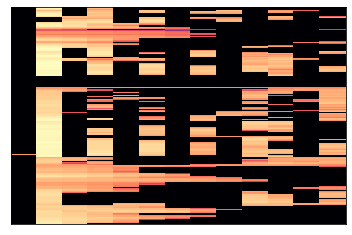

In [ ]:
#Inspecionando Manualmente as amostras com o MFCC
# num_mfcc=13, n_fft=2048, hop_length=512
y, sr =librosa.core.load('/content/content/audios_expecialistas/005b8518-03ba-4bf5-86d2-005541442357.wav')

y, index = librosa.effects.trim(y, top_db=50)
#y = np.resize(y, SAMPLE_RATE*5)# y.resize(sr*4)

# extract mfcc
mfcc = librosa.feature.mfcc(y, sr, n_mfcc=13, n_fft=2048, hop_length=512)
mfcc = mfcc.T

librosa.display.specshow(librosa.power_to_db(mfcc, ref=np.max))

print("%2.f shape da imagem"%(y.shape))

duracao = librosa.get_duration(y, sr)
print("Duração da imagem y em segundos: ")
print(duracao)

print("shape do mfcc: ")
print(mfcc.shape)

#import IPython.display as ipd
#ipd.display(ipd.Audio(data=y, rate=sr))

[  4608 142884]
(138276,)
(128, 271)
6.271020408163265
(128, 271)


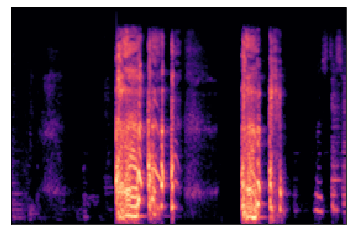

In [ ]:
#inspecionando manualmente as amostras com o MEL spectogram
y, sr =librosa.core.load('/content/content/audios_expecialistas/005b8518-03ba-4bf5-86d2-005541442357.wav')

y, index = librosa.effects.trim(y, top_db=50)
print(index)
#y = np.resize(y, sr*5) # y.resize(sr*4)
ms = librosa.feature.melspectrogram(y=y, sr=sr)

librosa.display.specshow(librosa.power_to_db(ms, ref=np.max))
print(y.shape)
print(ms.shape)
print(librosa.get_duration(y, sr = sr))
mel_spect = librosa.power_to_db(ms, ref=np.max)
print(mel_spect.shape)

import IPython.display as ipd
ipd.display(ipd.Audio(data=y, rate=sr))

Som original ... 
WAV file: 0dfa1560-9b26-4474-a9d9-d96c05424fbc.wav - tempo de duração: 14.520000, sr = 44100, x.shape = (320166,), x.dtype = float32


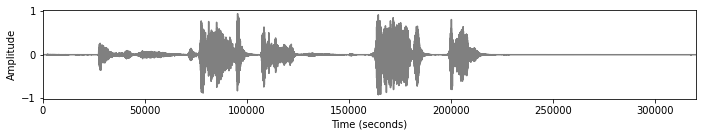

Som com o trim 29 db... 
WAV file: 0dfa1560-9b26-4474-a9d9-d96c05424fbc.wav - tempo de duração: 8.521723, sr = 44100, x.shape = (187904,), x.dtype = float32


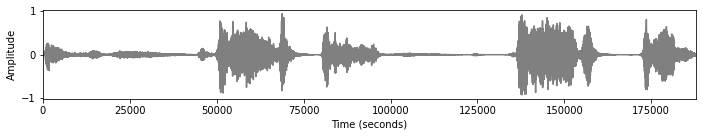

Som com o trim 50 db... 
WAV file: 0dfa1560-9b26-4474-a9d9-d96c05424fbc.wav - tempo de duração: 9.845261, sr = 44100, x.shape = (217088,), x.dtype = float32


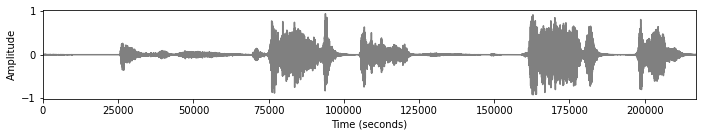

Som com o trim 60 db (valor default)... 
WAV file: 0dfa1560-9b26-4474-a9d9-d96c05424fbc.wav - tempo de duração: 14.419592, sr = 44100, x.shape = (317952,), x.dtype = float32


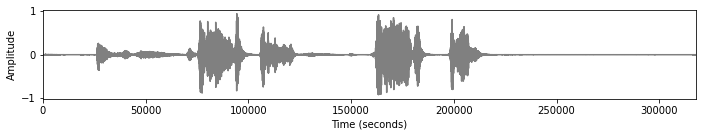

In [ ]:
# Exemplo do dataset : apresenta a amplitude x tempo e o tempo de duração do audio
#500, 10, 1000, 5050
number_audio_clip = 120
print("Som original ... ")
x, sr = librosa.core.load(audio_fpath+audio_clips[number_audio_clip], sr = SAMPLE_RATE)
plotAudioPlay(x=x, sr=SAMPLE_RATE, text='WAV file: '+audio_clips[number_audio_clip])

print("Som com o trim 29 db... ")
trim_x = librosa.effects.trim(x, top_db=29)[0] 
plotAudioPlay(x=trim_x, sr=SAMPLE_RATE, text='WAV file: '+audio_clips[number_audio_clip])

print("Som com o trim 50 db... ")
trim_x = librosa.effects.trim(x, top_db=50)[0] 
plotAudioPlay(x=trim_x, sr=SAMPLE_RATE, text='WAV file: '+audio_clips[number_audio_clip])

print("Som com o trim 60 db (valor default)... ")
trim_x = librosa.effects.trim(x, top_db=60)[0] 

plotAudioPlay(x=trim_x, sr=SAMPLE_RATE, text='WAV file: '+audio_clips[number_audio_clip])

In [ ]:
#... Demora muito... Só executar se necessário

#OBS: Se quiser FUTURAMENTE normalizar os audios menores para conter o tempo 
#     igual de duração de X segundos
#     Neste caso -> Remover os comentários da função e 
#     executar uma vez apenas, pois os arquivos são sobrescritos com a nova
#     duração.

#Executando função para saber apenas o tempo de duração dos audios
durationOriginal,durationTrim,durationTrim50,durationTrim60 = normalizarDuracaoAudios(audio_fpath,audio_clips)

Streaming output truncated to the last 5000 lines.
Nome do áudio analisado: /content/content/audios_expecialistas/8265cc92-ef3e-43ff-83cb-dd741b5e35b2.wav
Tempo de duração original : 9.96 segundos
Tempo de duração com o trim 28db : 6.00 segundos
487
Nome do áudio analisado: /content/content/audios_expecialistas/89bad459-b4f0-48ab-9907-28fe8f895800.wav
Tempo de duração original : 9.78 segundos
Tempo de duração com o trim 28db : 1.42 segundos
488
Nome do áudio analisado: /content/content/audios_expecialistas/bc74e39c-ab99-475d-932c-289473b9de54.wav
Tempo de duração original : 8.46 segundos
Tempo de duração com o trim 28db : 3.12 segundos
489
Nome do áudio analisado: /content/content/audios_expecialistas/ce3f9e37-b553-4c23-b341-8da601f7468e.wav
Tempo de duração original : 6.06 segundos
Tempo de duração com o trim 28db : 5.00 segundos
490
Nome do áudio analisado: /content/content/audios_expecialistas/b392ae80-f91a-4a78-bad3-2e8a8c8130d2.wav
Tempo de duração original : 6.06 segundos
Tempo d

 ... Duração original ... 
Duração --->  {1.08: 1, 1.62: 1, 1.68: 1, 1.74: 1, 1.8: 1, 2.04: 1, 2.1: 2, 2.22: 2, 2.28: 2, 2.34: 3, 2.4: 1, 2.46: 3, 2.52: 1, 2.64: 3, 2.7: 2, 2.76: 6, 2.82: 3, 2.88: 2, 2.94: 3, 3.0: 2, 3.06: 4, 3.12: 3, 3.18: 8, 3.24: 4, 3.3: 4, 3.36: 5, 3.42: 3, 3.48: 5, 3.54: 3, 3.6: 4, 3.66: 6, 3.72: 5, 3.78: 4, 3.84: 4, 3.9: 2, 3.96: 6, 4.02: 5, 4.08: 4, 4.14: 14, 4.2: 10, 4.26: 7, 4.32: 8, 4.38: 10, 4.44: 4, 4.5: 3, 4.56: 6, 4.62: 10, 4.68: 4, 4.74: 12, 4.8: 7, 4.86: 6, 4.92: 5, 4.98: 7, 5.04: 9, 5.1: 5, 5.16: 12, 5.22: 5, 5.28: 7, 5.34: 9, 5.4: 10, 5.46: 10, 5.52: 5, 5.58: 5, 5.64: 8, 5.7: 6, 5.76: 2, 5.82: 6, 5.88: 12, 5.94: 4, 6.06: 5, 6.12: 3, 6.18: 5, 6.24: 6, 6.3: 5, 6.36: 7, 6.42: 6, 6.48: 6, 6.54: 5, 6.6: 8, 6.66: 8, 6.72: 5, 6.78: 9, 6.84: 4, 6.9: 7, 6.96: 4, 7.02: 8, 7.08: 4, 7.14: 4, 7.2: 6, 7.26: 7, 7.32: 6, 7.38: 7, 7.44: 5, 7.5: 9, 7.56: 1, 7.62: 5, 7.68: 2, 7.74: 4, 7.8: 5, 7.86: 5, 7.92: 6, 7.98: 2, 8.04: 9, 8.1: 10, 8.16: 5, 8.22: 7, 8.28: 7, 8.34: 

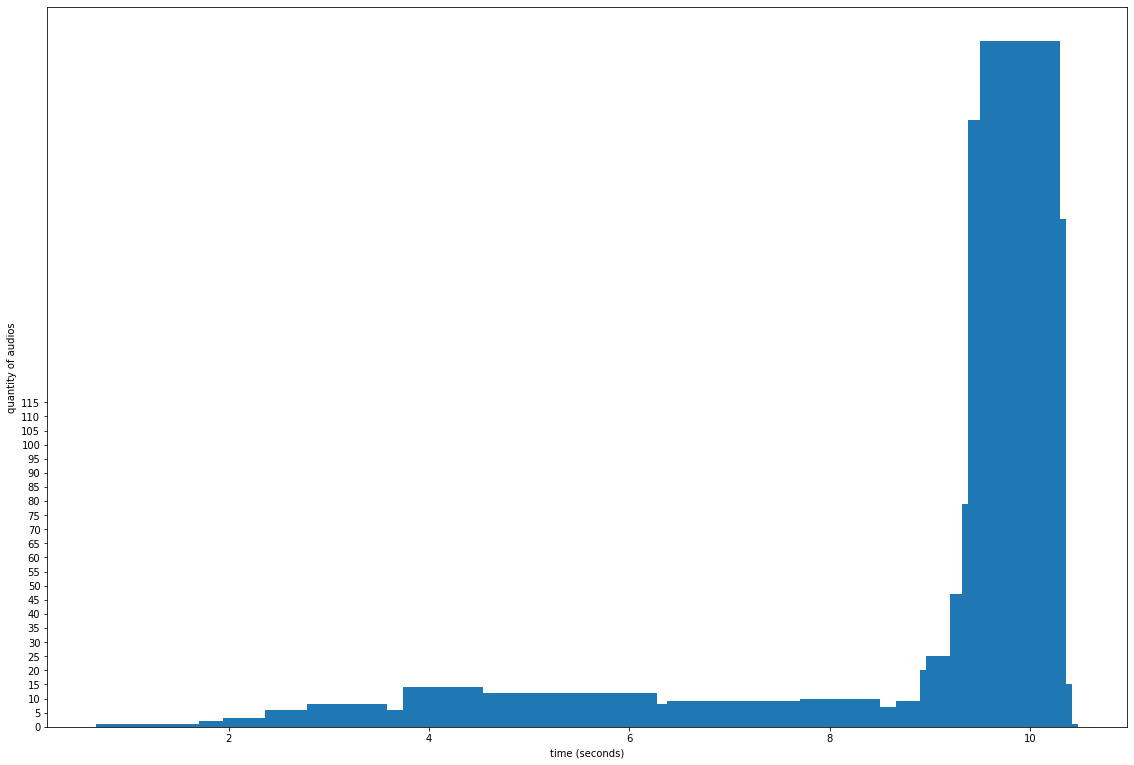

In [ ]:
print(" ... Duração original ... ")
dictDuration = calculoMetricasDurationOriginal(durationOriginal)
plotDuracaoOriginal(dictDuration)

 ... Duração trim 28 db... 
Duração --->  {0.2786394557823129: 2, 0.3250793650793651: 1, 0.33668934240362813: 1, 0.37151927437641724: 1, 0.3831292517006803: 2, 0.3947392290249433: 2, 0.4179591836734694: 1, 0.44117913832199546: 1, 0.4527891156462585: 1, 0.5224489795918368: 2, 0.5340589569160997: 1, 0.5456689342403628: 2, 0.5572789115646258: 2, 0.5688888888888889: 1, 0.592108843537415: 1, 0.615328798185941: 1, 0.626938775510204: 2, 0.6385487528344671: 2, 0.6501587301587302: 1, 0.6617687074829932: 4, 0.6733786848072563: 1, 0.6849886621315193: 1, 0.6965986394557823: 2, 0.7082086167800453: 3, 0.7314285714285714: 5, 0.7430385487528345: 1, 0.7546485260770975: 4, 0.7778684807256235: 4, 0.7894784580498866: 4, 0.8010884353741496: 2, 0.8126984126984127: 4, 0.8243083900226758: 4, 0.8359183673469388: 3, 0.8475283446712019: 3, 0.8591383219954648: 3, 0.8707482993197279: 4, 0.8823582766439909: 1, 0.893968253968254: 4, 0.905578231292517: 4, 0.9287981859410431: 1, 0.9404081632653061: 3, 0.95201814058956

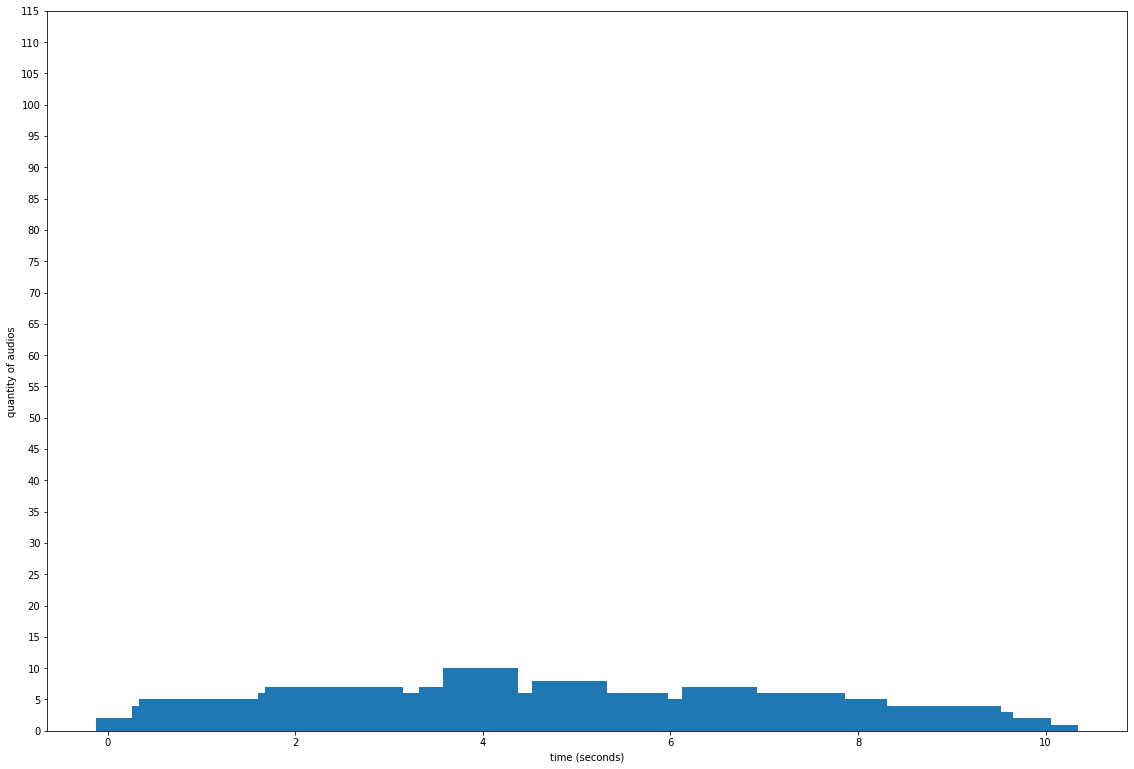

In [ ]:
print(" ... Duração trim 28 db... ")
dictDurationTrim = calculoMetricasDurationOriginal(durationTrim)
plotDuracaoOriginal(dictDurationTrim)

 ... Duração trim 50 db... 
Duração --->  {0.5456689342403628: 1, 0.6849886621315193: 1, 0.7082086167800453: 1, 0.7662585034013606: 1, 0.7778684807256235: 1, 0.8010884353741496: 2, 0.8924716553287982: 1, 0.893968253968254: 1, 0.9171882086167801: 1, 0.9287981859410431: 1, 0.9520181405895691: 1, 0.9752380952380952: 1, 1.0100680272108844: 1, 1.0216780045351475: 1, 1.0332879818594105: 1, 1.0448979591836736: 1, 1.0681179138321995: 1, 1.0797278911564625: 2, 1.0913378684807256: 2, 1.1029478458049886: 1, 1.172607709750567: 1, 1.195827664399093: 3, 1.2190476190476192: 1, 1.2388208616780045: 1, 1.242267573696145: 1, 1.253877551020408: 1, 1.2887074829931973: 1, 1.3119274376417234: 1, 1.3351473922902495: 1, 1.3467573696145125: 2, 1.3699773242630386: 1, 1.3815873015873017: 1, 1.4048072562358276: 1, 1.4164172335600906: 2, 1.4396371882086167: 2, 1.4512471655328798: 2, 1.474467120181406: 1, 1.486077097505669: 2, 1.509297052154195: 2, 1.5209070294784581: 2, 1.5441269841269842: 1, 1.555736961451247: 1, 

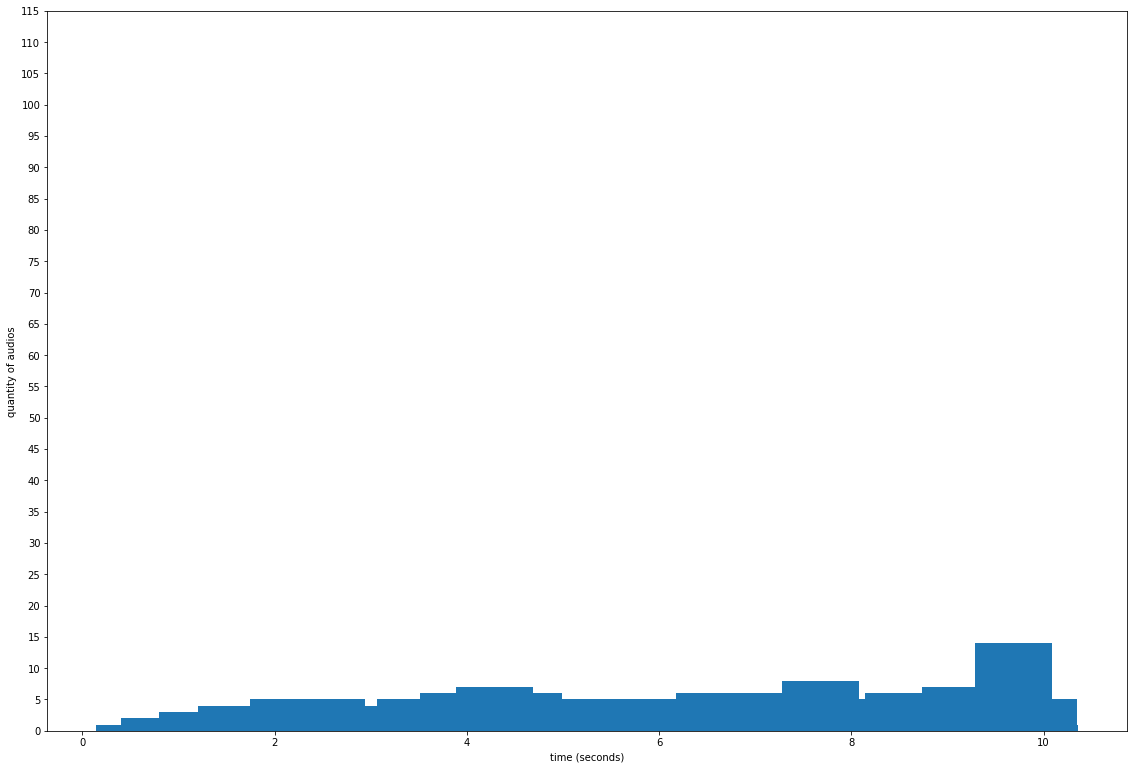

In [ ]:
print(" ... Duração trim 50 db... ")
dictDurationTrim50 = calculoMetricasDurationOriginal(durationTrim50)
plotDuracaoOriginal(dictDurationTrim50)

 ... Duração trim 60 db... 
Duração --->  {0.7894784580498866: 1, 0.8126984126984127: 1, 0.8710204081632653: 1, 0.905578231292517: 1, 0.9520181405895691: 1, 0.9636281179138322: 2, 1.0448979591836736: 2, 1.0797278911564625: 1, 1.0913378684807256: 1, 1.1145578231292517: 1, 1.1377777777777778: 1, 1.207437641723356: 1, 1.242267573696145: 1, 1.253877551020408: 1, 1.3699773242630386: 2, 1.4048072562358276: 1, 1.4164172335600906: 1, 1.4396371882086167: 1, 1.4512471655328798: 2, 1.4932879818594105: 1, 1.497687074829932: 2, 1.5174603174603174: 1, 1.5194104308390022: 1, 1.5209070294784581: 1, 1.5325170068027212: 2, 1.595283446712018: 1, 1.6021768707482993: 1, 1.6137868480725623: 1, 1.6486167800453515: 1, 1.6718367346938776: 1, 1.6834467120181407: 1, 1.7066666666666668: 1, 1.7298866213151927: 1, 1.7647165532879818: 2, 1.787936507936508: 1, 1.822766439909297: 1, 1.8343764172335602: 1, 1.8459863945578232: 1, 1.9040362811791383: 1, 1.9272562358276644: 1, 1.9620861678004535: 1, 1.9736961451247166: 1,

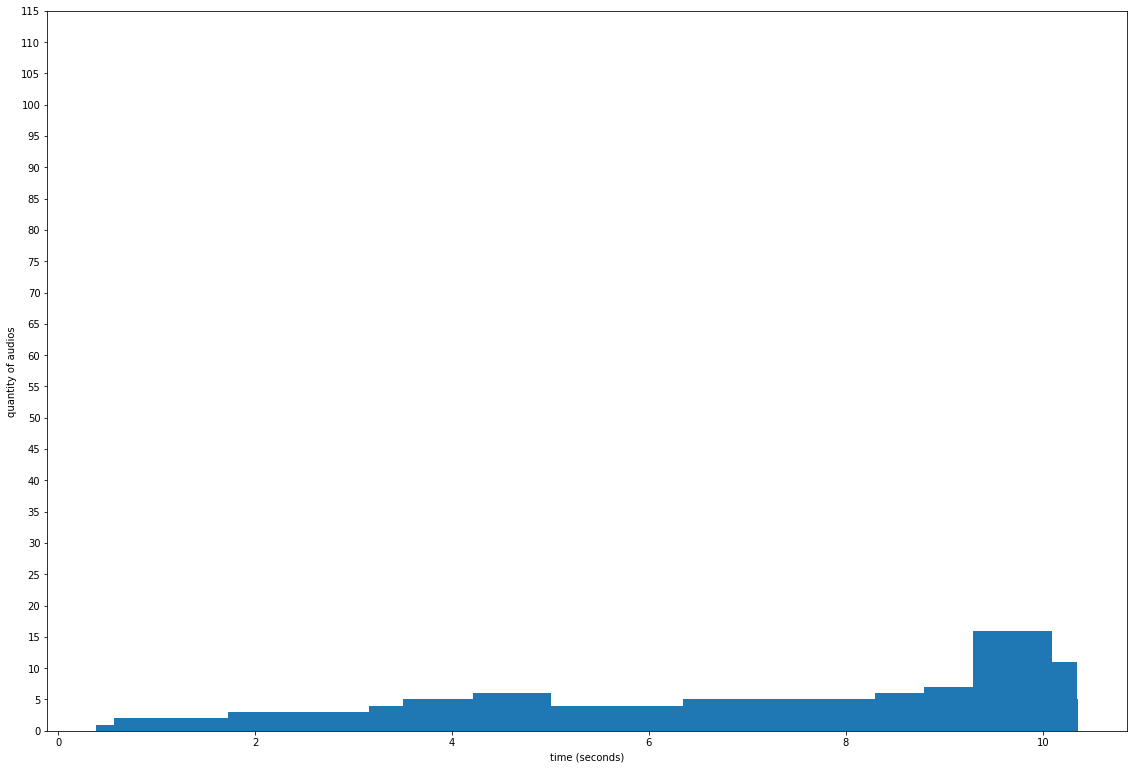

In [ ]:
print(" ... Duração trim 60 db... ")
dictDurationTrim60 = calculoMetricasDurationOriginal(durationTrim60)
plotDuracaoOriginal(dictDurationTrim60)

1- Waveform
2- spectrogram
3- Applying log transformation on the loaded audio signals


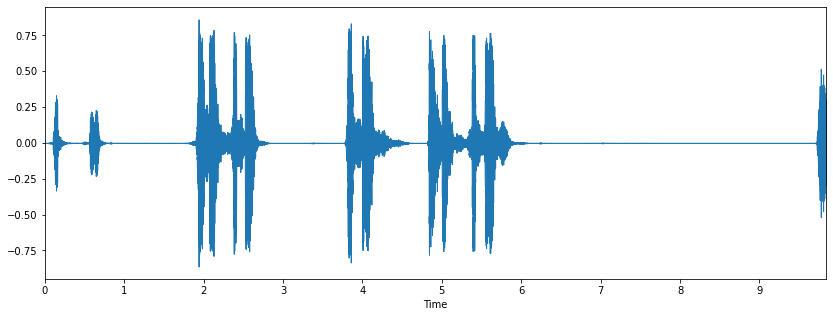

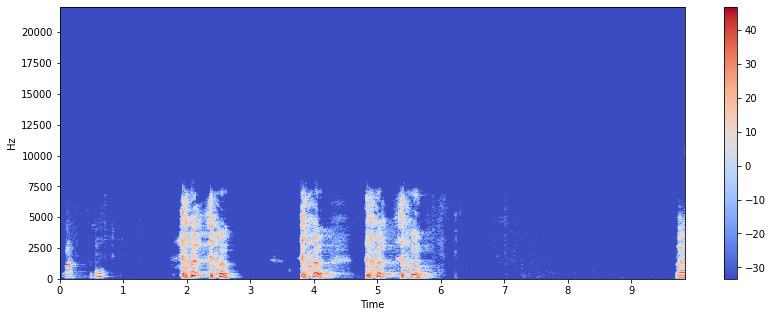

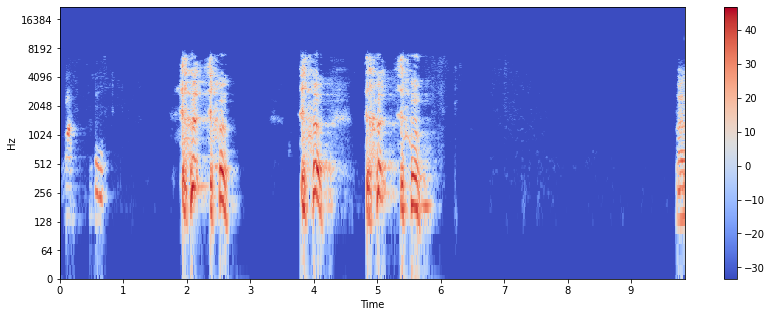

In [ ]:
plotAudioExemplo(x)